In [3]:
#1.
def Print_values(a, b, c):
    #比较 a, b, c 的大小
    if a > b:
        if b > c:
            values = [a, b, c]
        else:
            if a > c:
                values = [a, c, b]
            else:
                values = [c, a, b]
    else:
        if b > c:
            print("无输出")
            return
        else:
            values = [c, b, a]
    x, y, z = values[0], values[1], values[2]
    result = x + y - 10 * z
    print("Result:", result)
#当 a = 5, b = 15, c = 10时
Print_values(5, 15, 10)


无输出


In [8]:
#2.
import math
def F(x, a={}):
    if x == 1:
        return 1
    if x in a:
        return a[x]
    y = math.ceil(x / 3)
    result = F(y, a) + 2 * x
    a[x] = result
    return result
numbers = [1, 3, 5, 10, 20]
for i in numbers:
    print(f"F({i}) =", F(i))

F(1) = 1
F(3) = 7
F(5) = 15
F(10) = 33
F(20) = 61


In [16]:
#3.1
def Find_number_of_ways(x):
    ways = {0: 1}
    for i in range(10): 
        new_ways = {}
        for total in ways:
            for face in range(1, 7): 
                new_total = total + face
                if new_total in new_ways:
                    new_ways[new_total] += ways[total]
                else:
                    new_ways[new_total] = ways[total]
        ways = new_ways
    return ways.get(x, 0)
#3.2
Number_of_ways = []
for x in range(10, 61):
    Number_of_ways.append(Find_number_of_ways(x))
max_count = max(Number_of_ways)
max_x = Number_of_ways.index(max_count) + 10  
print("最大组合数 x =", max_x)
print("组合数是：", max_count)

最大组合数 x = 35
组合数是： 4395456


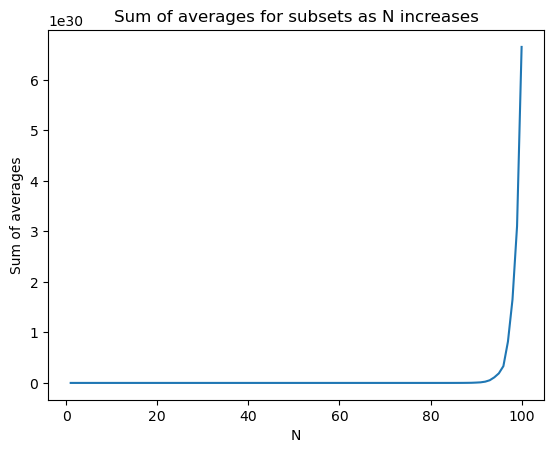

In [4]:
import random
import math
import matplotlib.pyplot as plt
#4.1 
def Random_integer(N):
    return [random.randint(0, 10) for i in range(N)]
#4.2 
def Sum_averages(arr):
    N = len(arr)
    total_sum = sum(arr)
    coeff = 0
    for k in range(1, N + 1):
        coeff += math.comb(N - 1, k - 1) / k
    return total_sum * coeff
#4.3 
Total_sum_averages = []

for N in range(1, 101):
    arr = Random_integer(N)
    total_avg = Sum_averages(arr)
    Total_sum_averages.append(total_avg)
#画图
plt.plot(range(1, 101), Total_sum_averages)
plt.xlabel('N')
plt.ylabel('Sum of averages')
plt.title('Sum of averages for subsets as N increases')
plt.show()

In [5]:
import random
#5.1 
def Create_matrix(N, M):
    matrix = []
    for i in range(N):
        row = []
        for j in range(M):
            if (i == 0 and j == 0) or (i == N-1 and j == M-1):
                row.append(1)
            else:
                row.append(random.randint(0, 1))
        matrix.append(row)
    return matrix
# 5.2
def Count_path(matrix):
    N = len(matrix)
    M = len(matrix[0])
    dp = [[0] * M for _ in range(N)]
    dp[0][0] = 1 if matrix[0][0] == 1 else 0
    for i in range(N):
        for j in range(M):
            if matrix[i][j] == 0:
                dp[i][j] = 0 
            else:
                if i > 0:
                    dp[i][j] += dp[i - 1][j]  
                if j > 0:
                    dp[i][j] += dp[i][j - 1]  #
    return dp[N - 1][M - 1]
#5.3 
def Run_experiment(N, M, runs=1000):
    total_paths = 0
    for _ in range(runs):
        matrix = Create_matrix(N, M)
        paths = Count_path(matrix)
        total_paths += paths
    mean_paths = total_paths / runs
    return mean_paths
if __name__ == "__main__":
    N = 10
    M = 8
    runs = 1000
    mean_result = Run_experiment(N, M, runs)
    print(f"N = {N}, M = {M}, {runs}次随机实验后的平均路径数为：{mean_result:.2f}")


N = 10, M = 8, 1000次随机实验后的平均路径数为：0.34
